#Фадеев Иван Статистика Экзамен БИЛЕТ 23
---



Во время выполнения заданий экзамена использование встроенных библиотек для вычисления статистических характеристик и проведения автоматизированных тестов, таких как критерий xi^2 или автоматическое определение p-значений и построение доверительных интерваллов, не было разрешено.

#### Добавляем все необходимые библиотеки:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1 вопрос (10 баллов)

 ## 1.1 Сгенерировать генеральную совокупность из 4300 целых чисел на отрезке $[10 ; 220]$. Выделить выборочную совокупность 1900 значений.

Сгенерируем массив из 4300 нормально распределенных целых чисел $N(\mu=115,\sigma= 40)$

In [ ]:
allNums = np.array([])
while allNums.size!= 4300:
  normalRandomInt = np.random.normal(115, 30, 1).round().astype(int)
  if 10 <= normalRandomInt <= 220:
    allNums = np.append(allNums, normalRandomInt)

allNums

array([161., 127.,  99., ..., 102.,  97.,  68.])

Выделяем из них выборку из 1900 значений

In [ ]:
data = np.random.choice(allNums, size=1900, replace=False) #replace - определяет будут ли присутствовать повторения
data

array([129., 158., 128., ..., 128., 115., 152.])

## 1.2 Составить интервальный вариационный ряд из 10-15 интервалов из выборочной совокупности

Интервал от 10 до 220 делим на 13 равных по длинне интервалов, и находим сколько значений из выборки попадает на каждый из интервалов

In [ ]:
n_intervals = 12 #количество интервалов
counts, bin_edges = np.histogram(data, bins = n_intervals)
counts, bin_edges

(array([ 10,  17,  49, 151, 251, 352, 384, 301, 222, 115,  35,  13]),
 array([ 18.        ,  33.33333333,  48.66666667,  64.        ,
         79.33333333,  94.66666667, 110.        , 125.33333333,
        140.66666667, 156.        , 171.33333333, 186.66666667,
        202.        ]))

##1.3. Построение графиков

Находим середины каждого из интервалов

In [ ]:
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2 #Центры интервалов
bin_centers

array([ 25.66666667,  41.        ,  56.33333333,  71.66666667,
        87.        , 102.33333333, 117.66666667, 133.        ,
       148.33333333, 163.66666667, 179.        , 194.33333333])

Находим относисельные частоты

In [ ]:
relative_freq = counts/data.size #относительные частоты
relative_freq

array([0.00526316, 0.00894737, 0.02578947, 0.07947368, 0.13210526,
       0.18526316, 0.20210526, 0.15842105, 0.11684211, 0.06052632,
       0.01842105, 0.00684211])

a) Полигон относительных частот

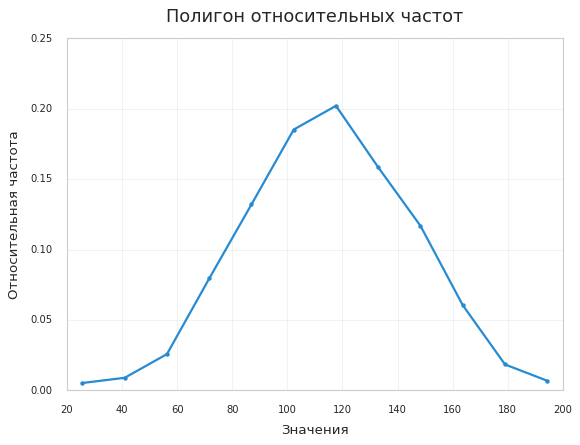

In [ ]:
plt.plot(bin_centers, relative_freq, marker='o', linestyle='-')
plt.xlabel('Значения')
plt.ylabel('Относительная частота')
plt.title('Полигон относительных частот')
plt.ylim(bottom=0)
plt.show()

б) Гистограмма относительных частот

Найдем плотность частот

In [ ]:
density_freq = relative_freq/(bin_edges[1] - bin_edges[0])
density_freq

array([0.00034325, 0.00058352, 0.00168192, 0.00518307, 0.00861556,
       0.01208238, 0.01318078, 0.01033181, 0.00762014, 0.00394737,
       0.00120137, 0.00044622])

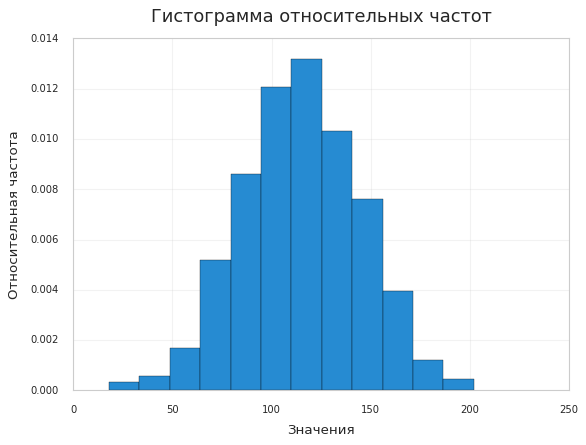

In [ ]:
plt.bar(bin_centers, density_freq, width=(bin_edges[1] - bin_edges[0]),edgecolor='black')
plt.xlabel('Значения')
plt.ylabel('Относительная частота')
plt.title('Гистограмма относительных частот')
plt.show()

в) График эмпирической функции распределения

Из имеющиеся выбоки строим вариационный ряд

In [ ]:
data_sorted = np.sort(data)
data_sorted

array([ 18.,  25.,  25., ..., 198., 200., 202.])

Считаем эмперическую вероятность того что, заданное значение не превосходит x

In [ ]:
y = np.arange(1, data.size+1) / data.size
y

array([5.26315789e-04, 1.05263158e-03, 1.57894737e-03, ...,
       9.98947368e-01, 9.99473684e-01, 1.00000000e+00])

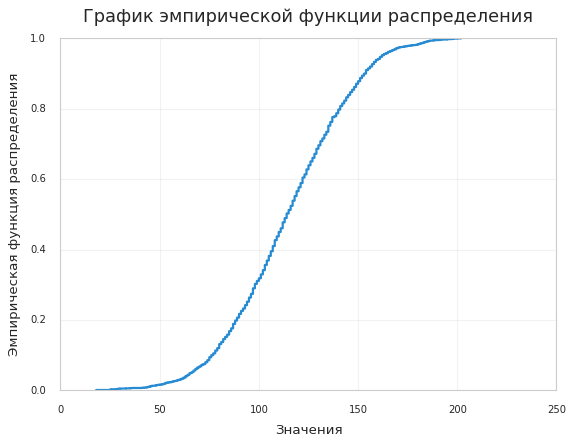

In [ ]:
plt.step(data_sorted, y, label='F*(x)')
plt.xlabel('Значения')
plt.ylabel('Эмпирическая функция распределения')
plt.title('График эмпирической функции распределения')
plt.show()

##1.4. Числовые характеристики выборки

Создадим функцию моментов $moment(x, k, n) = \frac{1}{n} \sum x_i^k$,

тогда математическое ожидание $E[x]=moment(x,1,n)$,

исправленная выборочная дисперсия $Var[X]=E[(X-E[X])^2]=moment(X-E[X],2,n-1)$

In [ ]:
def moment(x, k, n):
  return sum(x**k)/n

Создадим функцию для поиска моды

In [ ]:
def mode(arr):
    # Создаем словарь для подсчета количества вхождений каждого элемента
    count = {}
    for i in arr:
        if i in count:
            count[i] += 1
        else:
            count[i] = 1

    # Находим элемент с максимальным количеством вхождений
    max_count = 0
    mode = None
    for k, v in count.items():
        if v >= max_count:
            max_count = v
            mode = k

    return mode

Найдем все требуемые характеристики

In [ ]:
mean = moment(data,1,data.size)
median = (data_sorted[data.size//2]+data_sorted[data.size//2-1])/2
mode = mode(data)
var = moment(data-mean,2,data.size-1)
std = np.sqrt(var)
rsd = std / mean
skewness = moment(data-mean,3,data.size)/std**3
kurtosis = moment(data-mean,4,data.size)/std**4-3

print("Среднее значение:", mean)
print("Медиана:", median)
print("Мода:", mode)
print("Дисперсия:", var)
print("Стандартное отклонение:", std)
print("Коэффициент вариации:", rsd)
print("Коэффициент асимметрии:", skewness)
print("Коэффициент эксцесса:", kurtosis)

Среднее значение: 114.7142105263158
Медиана: 114.0
Мода: 135.0
Дисперсия: 895.8029575122637
Стандартное отклонение: 29.929967549468937
Коэффициент вариации: 0.26090897903710814
Коэффициент асимметрии: -0.02253047227483795
Коэффициент эксцесса: -0.12104326613446759


Также можно использовать стандартные библиотеки в python

In [ ]:
mean = np.mean(data)
median = np.median(data)
mode = stats.mode(data, axis=None, keepdims=False)[0]
var = np.var(data, ddof=1)
std = np.std(data, ddof=1)
rsd = std / mean
skewness = stats.skew(data)
kurtosis = stats.kurtosis(data)

print("Среднее значение:", mean)
print("Медиана:", median)
print("Мода:", mode)
print("Дисперсия:", var)
print("Стандартное отклонение:", std)
print("Коэффициент вариации:", rsd)
print("Коэффициент асимметрии:", skewness)
print("Коэффициент эксцесса:", kurtosis)

Среднее значение: 114.7142105263158
Медиана: 114.0
Мода: 135.0
Дисперсия: 895.8029575122642
Стандартное отклонение: 29.929967549468948
Коэффициент вариации: 0.26090897903710825
Коэффициент асимметрии: -0.022548271199096602
Коэффициент эксцесса: -0.11801039119712309


Для генеральной совокупности

In [ ]:
general_mean = np.mean(allNums)
general_median = np.median(allNums)
general_mode = stats.mode(allNums, axis=None, keepdims=False)[0]
general_var = np.var(allNums, ddof=1)
general_std = np.std(allNums, ddof=1)
general_rsd = general_std / general_mean
general_skewness = stats.skew(allNums)
general_kurtosis = stats.kurtosis(allNums)

print("Среднее значение генеральной совокупности:", general_mean,"|| Среднее значение выборки:", mean)
print("Медиана генеральной совокупности:", general_median,"|| Медиана выборки:", median)
print("Мода генеральной совокупности:", general_mode,"|| Мода выборки:",mode)
print("Дисперсия генеральной совокупности:", general_var,"|| Дисперсия выборки:",var)
print("Стандартное отклонение генеральной совокупности:", general_std,"|| Стандартное отклонение выборки:",std)
print("Коэффициент вариации генеральной совокупности:", general_rsd,"|| Коэффициент вариации выборки:", rsd)
print("Коэффициент асимметрии генеральной совокупности:", general_skewness,"|| Коэффициент асимметрии выборки:",skewness)
print("Коэффициент эксцесса генеральной совокупности:", general_kurtosis,"|| Коэффициент эксцесса выборки:",kurtosis)

Среднее значение генеральной совокупности: 115.25813953488372 || Среднее значение выборки: 114.7142105263158
Медиана генеральной совокупности: 115.0 || Медиана выборки: 114.0
Мода генеральной совокупности: 119.0 || Мода выборки: 135.0
Дисперсия генеральной совокупности: 887.8198337092997 || Дисперсия выборки: 895.8029575122642
Стандартное отклонение генеральной совокупности: 29.79630570572969 || Стандартное отклонение выборки: 29.929967549468948
Коэффициент вариации генеральной совокупности: 0.25851801726082535 || Коэффициент вариации выборки: 0.26090897903710825
Коэффициент асимметрии генеральной совокупности: 0.008461113786127149 || Коэффициент асимметрии выборки: -0.022548271199096602
Коэффициент эксцесса генеральной совокупности: -0.1398322102406695 || Коэффициент эксцесса выборки: -0.11801039119712309


## Построение теоретических аналогов

a) на чертеже гистограммы её теоретический аналог $f(x)$

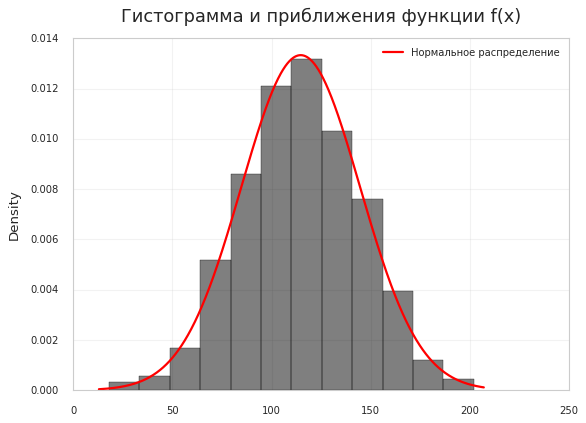

In [ ]:
sns.histplot(data, bins = n_intervals, stat='density',color='black', edgecolor='black', alpha=0.5)

x = np.linspace(data.min()-5, data.max()+5, 1000)
plt.plot(x, stats.norm.pdf(x,mean,std),color='red', label='Нормальное распределение')

plt.title('Гистограмма и приближения функции f(x)')
plt.legend(loc='upper right')
plt.show()

 б) На чертеже эмпирической функции $F^*(x)$ её теоретический аналог $F(x)$

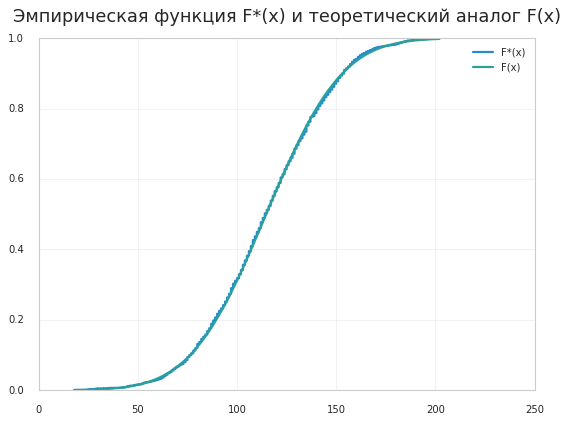

In [ ]:
x = np.linspace(data.min(), data.max(), data.size)
plt.step(data_sorted, y, label='F*(x)')
plt.plot(x, stats.norm.cdf(x, mean,std), label='F(x)')
plt.title('Эмпирическая функция F*(x) и теоретический аналог F(x)')
plt.legend()
plt.show()

# 2 вопрос ( 25 баллов)

## 2.1 Гипотеза о распределении генеральной совокупности

Гипотеза: генеральная совокупность имеет нормальное распределение

## 2.2 Проверка выполнения правила "трех сигм"

In [ ]:
within_3_sigma = np.sum((data >= mean - 3 * std) & (data <= mean + 3 * std))
percentage = within_3_sigma / data.size * 100
print(f'Процент значений в пределах трех сигм: {percentage}%')

Процент значений в пределах трех сигм: 99.94736842105263%


## 2.3 Применив критерий согласия Пирсона $\chi^2$ с заданным уровнем значимости $\alpha=0,05$, окончательно принять или отвергнуть выдвинутую гипотезу о распределении генеральной совокупности.

Определяем ожидаемое количество наблюдений в каждом интервале при нормальном распределении

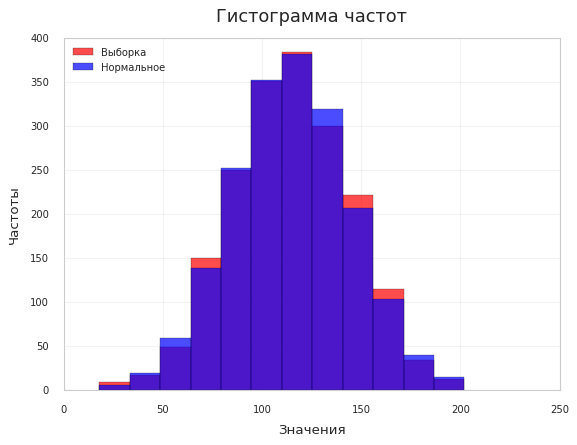

In [ ]:
norm_h= [stats.norm.cdf(bin_edges[i+1], loc=mean, scale=std) - stats.norm.cdf(bin_edges[i], loc=mean, scale=std) for i in range(1,n_intervals-1)]
norm_h.insert(0,stats.norm.cdf(bin_edges[1], loc=mean, scale=std))
norm_h.append(1-stats.norm.cdf(bin_edges[-2], loc=mean, scale=std))
norm_h=np.array(norm_h)*data.size

plt.bar(bin_centers, counts, width=(bin_edges[1] - bin_edges[0]), color='red',edgecolor='black',alpha=0.7, label='Выборка')
plt.bar(bin_centers, norm_h, width=(bin_edges[1] - bin_edges[0]),color='blue',edgecolor='black', alpha=0.7, label='Нормальное')
plt.xlabel('Значения')
plt.ylabel('Частоты')
plt.title('Гистограмма частот')
plt.legend(loc='upper left')
plt.show()

Высчитаем занчение критерия пирсона $\chi^2$

In [ ]:
xi = sum(((counts-norm_h)**2/norm_h))
print(f'xi2 статистика: {xi}')

xi2 статистика: 9.994503264305903


Высчитаем $p$ значение критерия

In [ ]:
p = 1-stats.chi2.cdf(xi,n_intervals-1)
alpha= 0.05
if p>alpha:
  print('Принимаем гипотезу о нормальном распределении')
else:
  print('Отвергаем гипотезу о нормальном распределении')

print(f'p значение: {p}')

Принимаем гипотезу о нормальном распределении
p значение: 0.5308816555437496


Построим график $\chi^2$ распределения

Синяя точка, критическое значение $\alpha$ начиная с которого мы отвергаем нулевую гипотезу

Красная точка, значение получившигося $\chi^2$ критерия

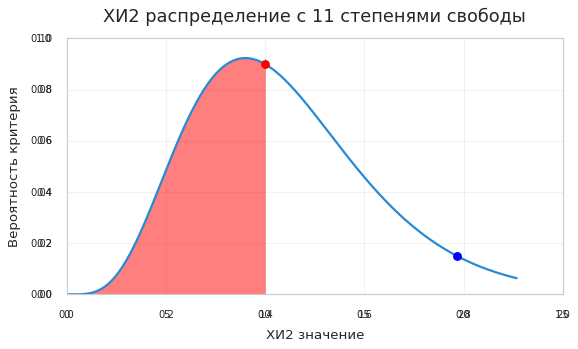

In [ ]:
df = n_intervals-1
xi_alpha= stats.chi2.ppf(1-alpha,df)
x = np.linspace(0, xi_alpha+3, 500)
y = stats.chi2.pdf(x, df)

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=x, y=y, ax=ax)

ax.plot([xi],stats.chi2.pdf(xi, df), marker='o', markersize=8, color="red")

ax.plot([xi_alpha],stats.chi2.pdf(xi_alpha, df), marker='o', markersize=8, color="blue")

ax.fill_betweenx(y, x, xi, where=(x < xi), color='red', alpha=0.5)

ax.set(xlabel='ХИ2 значение', ylabel=f'Вероятность критерия', title=f"ХИ2 распределение с {df} степенями свободы")

plt.show()

# 3 вопрос (25 баллов)

## 3.1 Построить

a) полигон относительных частот $p_i^*$ и кривую распределения $p_i$

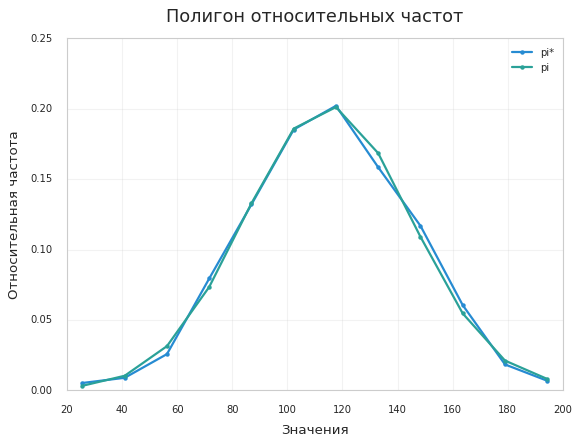

In [ ]:
x=np.linspace(35,115,500)
plt.plot(bin_centers, relative_freq, marker='o', linestyle='-', label='pi*')
plt.plot(bin_centers, norm_h/data.size, marker='o', linestyle='-', label='pi')


plt.xlabel('Значения')
plt.ylabel('Относительная частота')
plt.title('Полигон относительных частот')
plt.legend()
plt.show()

б) гистограмму теоретических вероятностей (относительных частот) $p_i$ и $f(x)$. Сравнить график $p_i$ с графиком идеально нормального распределения, используя значения $a_s^*, \varepsilon_k^*$

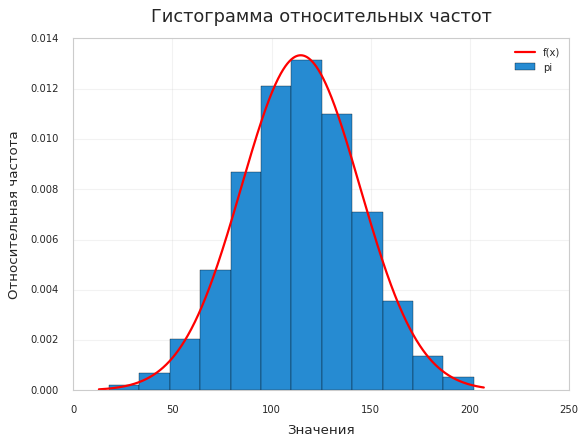

In [ ]:
x = np.linspace(data.min()-5, data.max()+5, 1000)
plt.bar(bin_centers, norm_h/data.size/(bin_edges[1] - bin_edges[0]), width=(bin_edges[1] - bin_edges[0]), edgecolor='black',label='pi')
plt.plot(x, stats.norm.pdf(x,mean,std),color='red', label='f(x)')
plt.xlabel('Значения')
plt.ylabel('Относительная частота')
plt.title('Гистограмма относительных частот')
plt.legend(loc='upper right')
plt.show()

In [ ]:
skewness = sum((bin_centers-mean)**3/std**3*norm_h/data.size)
kurtosis = sum((bin_centers-mean)**4/std**4*norm_h/data.size)-3

print("Коэффициент асимметрии:", skewness)
print("Коэффициент эксцесса:", kurtosis)

Коэффициент асимметрии: -0.01762189830479413
Коэффициент эксцесса: -0.04431243683589825


## 3.2 Найти доверительные интервалы для генеральной средней и генерального среднего квадратического отклонения по уровню надёжности $\gamma=0,99$

Для нахождения доверительного интервала для среднего, используем распределение стьюдента

$$\overline{x}-t_{\text{Крит}}\frac{\sigma}{\sqrt{n}}<E[x]<\overline{x}+t_{\text{Крит}}\frac{\sigma}{\sqrt{n}}$$

In [ ]:
confidence_level = 0.99
alpha = 1-confidence_level
z = stats.t.ppf(1- alpha / 2, data.size-1)

margin_of_error_mean = z * std / np.sqrt(data.size)
confidence_interval_mean = (mean - margin_of_error_mean, mean + margin_of_error_mean)
print(f'Доверительный интервал для среднего: {confidence_interval_mean}')

Доверительный интервал для среднего: (112.94376227531161, 116.48465877731998)


Для нахождения доверительного интервала для СКО используем распределение $\chi^2$

$$\sqrt{\frac{s^2(n-1)}{\chi^2_{upper}}}<\sigma<\sqrt{\frac{s^2(n-1)}{\chi^2_{lower}}}$$

In [ ]:
chi2_lower = stats.chi2.ppf(alpha / 2, data.size - 1)
chi2_upper = stats.chi2.ppf(1 - alpha / 2, data.size - 1)
confidence_interval_std = (np.sqrt((data.size - 1) * std**2 / chi2_upper), np.sqrt((data.size - 1) * std**2 / chi2_lower))
print(f'Доверительный интервал для среднеквадратического отклонения: {confidence_interval_std}')

Доверительный интервал для среднеквадратического отклонения: (28.726143417633526, 31.231557037379567)
